In [1]:
%pylab inline

import pyart
import wradlib as wrl
import pandas as pd
import tempfile
import os

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

from copy import deepcopy
import boto3
from botocore.handlers import disable_signing

import datetime as dt
import pytz

Populating the interactive namespace from numpy and matplotlib

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



C:\Users\iac6311\AppData\Local\Continuum\anaconda3\envs\saveurproj\lib\site-packages\botocore\vendored\requests\packages\urllib3\_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, MutableMapping
C:\Users\iac6311\AppData\Local\Continuum\anaconda3\envs\saveurproj\lib\site-packages\botocore\vendored\requests\packages\urllib3\_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, MutableMapping


In [2]:
fname = 'QVP_10deg/qvp_10deg_20170110.hdf5.npy'

d = np.load(fname, allow_pickle=True)

C:\Users\iac6311\AppData\Local\Continuum\anaconda3\envs\saveurproj\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
qvp_refl = d.item()['reflectivity']
qvp_time = d.item()['time']
qvp_height = d.item()['height']
qvp_range = d.item()['range']

C:\Users\iac6311\AppData\Local\Continuum\anaconda3\envs\saveurproj\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\iac6311\AppData\Local\Continuum\anaconda3\envs\saveurproj\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\iac6311\AppData\Local\Continuum\anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


Text(0.5, 1.0, 'QVP at 10 deg 2017-01-10')

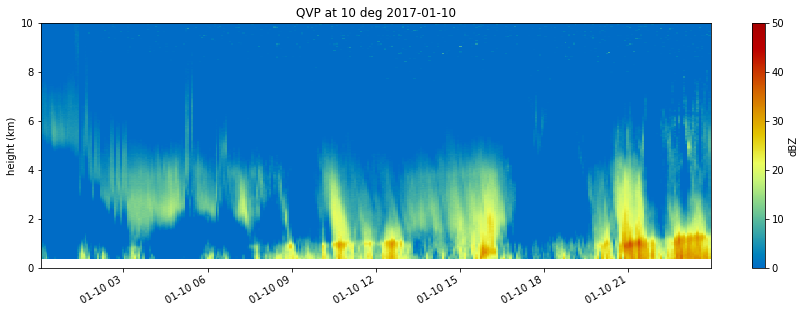

In [4]:
# Plot
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

qmesh = plt.pcolormesh(qvp_time, qvp_height[-1]/1000., qvp_refl.T, vmin=0, vmax=50, cmap=pyart.graph.cm_colorblind.HomeyerRainbow)
ax = plt.gca()

cb = fig.colorbar(qmesh,ax=ax)
cb.set_label('dBZ')
ax.axis('tight')

ax.set_ylabel('height (km)')

# Set up as dates
ax.xaxis_date()
fig.autofmt_xdate()

ax.set_ylim((0,10))

titlestr = dt.datetime.strptime(fname, 'QVP_10deg/qvp_10deg_%Y%m%d.hdf5.npy')
ax.set_title("QVP at 10 deg " +str(titlestr.date()))

# LOOP

In [5]:
d0 = dt.datetime(2017, 1,1)
d1 = dt.datetime(2017, 12,31)
td = dt.timedelta(days = 1)
dates = np.arange(d0, d1, td).astype(dt.datetime)

C:\Users\iac6311\AppData\Local\Continuum\anaconda3\envs\saveurproj\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
for d in dates:
    #print(d)
    fname = './QVP_10deg_sector/qvp_sector_10deg_'+str(d.year)+str(d.month).zfill(2)+str(d.day).zfill(2)+'.hdf5.npy'
    
    try:
        data = np.load(fname, allow_pickle=True)
    except FileNotFoundError:
        print('XXX_'+fname)
        continue
    print(fname)
    
    qvp_refl = data.item()['qvp_land_reflectivity']
    qvp_time = data.item()['qvp_land_time']
    qvp_height = data.item()['qvp_land_height']
    qvp_range = data.item()['qvp_land_range']
    
    # Plot
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)

    qmesh = plt.pcolormesh(qvp_time, qvp_height[-1]/1000., qvp_refl.T, vmin=0, vmax=50, cmap=pyart.graph.cm_colorblind.HomeyerRainbow)
    ax = plt.gca()

    cb = fig.colorbar(qmesh,ax=ax)
    cb.set_label('dBZ')
    ax.axis('tight')

    ax.set_ylabel('height (km)')

    # Set up as dates
    ax.xaxis_date()
    fig.autofmt_xdate()

    ax.set_ylim((0,10))

    datestr = dt.datetime.strptime(fname, './QVP_10deg_sector/qvp_sector_10deg_%Y%m%d.hdf5.npy')
    titlestr = "QVP at 10 deg " +str(datestr.date())
    ax.set_title(titlestr)
    
    savefname = dt.datetime.strftime(datestr, 'qvp_land_sector_10deg_%Y%m%d.png')
    plt.savefig(savefname)

C:\Users\iac6311\AppData\Local\Continuum\anaconda3\envs\saveurproj\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


./QVP_10deg_sector/qvp_sector_10deg_20170101.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170102.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170103.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170104.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170105.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170106.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170107.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170108.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170109.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170110.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170111.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170112.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170113.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170114.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170115.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170116.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170117.hdf5.npy
./QVP_10deg_sector/qvp_sector_10deg_20170118.hdf5.npy
./QVP_10deg_sector/qvp_secto